# Kernel Density Estimation (Gaussian Kernels)

In [1]:
import numpy as np 
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from statistics import mean
import random

In [2]:
#Data
data=yf.download('^GSPC',start='2007-1-1',end='2019-12-31')['Close']
xt=np.log(1+data.pct_change()).dropna().values

[*********************100%***********************]  1 of 1 completed


In [3]:
class Kernel:
    
    def __init__(self,Xt,bins,h):
        self.Xt=Xt                                                     #Data
        self.bins=bins                                                 #Number of x steps
        self.h=h                                                       #Smoothness parameter
        self.x=np.arange(Xt.min(),Xt.max(),(Xt.max()-Xt.min())/bins)   #density bins
        self.KDE=None 
        self.cum_distr=[]

    def density(self,hist_bins=10,plot=True,histogram=True):
        Xt_matrix=np.tile(self.Xt,(self.x.shape[0],1)).T
        x_matrix=np.tile(self.x,(self.Xt.shape[0],1))

        self.KDE=np.mean(norm(0,self.h).pdf(Xt_matrix-x_matrix),axis=0)
        
        if plot==True:
            plt.figure(figsize=(15,10))
            plt.plot(self.x,self.KDE,label='Kernel density est.',linewidth=3,c='black')
            if histogram==True:
                plt.hist(self.Xt,bins=hist_bins,density=True,label='Histogram',color='orange')
            plt.legend(loc=0)
            plt.xlabel('x (N steps='+str(self.bins)+')',fontsize=15)
            plt.show() 
    
    def pdf(self,obs):
        step=(self.Xt.max()-self.Xt.min())/self.bins
        
        if self.Xt.min()<obs<self.Xt.max():
            marker=np.where(np.isclose(self.x,obs,rtol=step,atol=step))[0][0]
            area=sum(self.KDE[marker:]*step)

        elif obs<=self.Xt.min():
            area=1
        
        elif obs>=self.Xt.max():
            area=0
        
        return area

    def cdf(self,obs):
        step=(self.Xt.max()-self.Xt.min())/self.bins
        
        if self.Xt.min()<obs<self.Xt.max():
            marker=np.where(np.isclose(self.x,obs,rtol=step,atol=step))[0][0]
            area=sum(self.KDE[:marker]*step)

        elif obs<=self.Xt.min():
            area=0
        
        elif obs>=self.Xt.max():
            area=1
        
        return area
    
    def cumulative(self):
        for i in self.x:
            self.cum_distr.append(self.cdf(i))
    
    def rand_sample(self,nsamples):
        if self.cum_distr==[]:
            self.cumulative()
        
        random_samples=[]
        for i in range(nsamples):
            p=random.random()
            try:
                placeholder=np.where(np.isclose(self.cum_distr,p,rtol=0.1/self.bins,atol=0.1/self.bins))[0][0]
                random_samples.append(self.x[placeholder])
            except:
                pass
            
        return random_samples
        

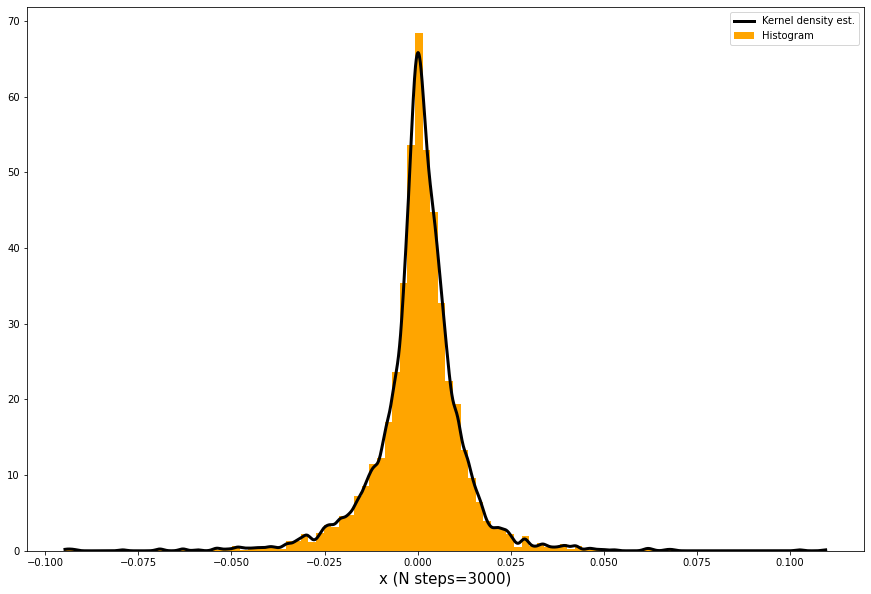

0.00045277014843049686

In [4]:
kde=Kernel(xt,3000,0.001)
kde.density(hist_bins=100)
kde.pdf(0.1)